<a href="https://colab.research.google.com/github/marioesm/TFM---CODIGO/blob/main/Data_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conectando Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Importando librerías

In [ ]:
pip install -q yellowbrick

In [ ]:
import numpy as np # Para trabajo con vectores
import pandas as pd # Para manipulación y análisis de datos
import seaborn as sns # Para graficar
import matplotlib.pyplot as plt # Para graficar
from matplotlib import colors
import matplotlib.font_manager
from yellowbrick.cluster import KElbowVisualizer # Librería diseñada para representar el número correcto de clústers.
from sklearn.cluster import KMeans, AgglomerativeClustering, MiniBatchKMeans # Algoritmos no supervisados a implementar.
from sklearn.metrics import silhouette_samples, silhouette_score # Métricas para gráficas Silhouette
import matplotlib.cm as cm # Color Manager
import warnings
warnings.filterwarnings("ignore") # Cancelar Warnings

# Importando datos

In [ ]:
file_path = '/content/gdrive/MyDrive/UCM/Mario/Data/el-futuro-es-clima-anonimizado_post_pca.csv'
df_cluster = pd.read_csv(file_path)

In [ ]:
df_cluster

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.540911,-0.350949,0.074318,-0.060599,-0.070559,-0.380636,0.238780,0.055974
1,1.003496,-0.577169,0.205593,-0.035895,0.340446,-0.312102,0.075347,-0.029255
2,0.169404,0.986208,-0.862286,0.535702,0.274353,0.634601,0.201765,-0.022266
3,0.798489,-0.523492,-0.016899,-0.077170,0.004095,0.195877,-0.447976,0.282094
4,0.254601,0.650970,-0.023426,0.709921,-0.844018,-0.307330,-0.142645,0.021260
...,...,...,...,...,...,...,...,...
3097,1.268259,0.457872,0.983221,0.449955,-0.287797,0.185977,-0.405777,-0.323763
3098,0.126509,0.695501,-0.084077,0.754289,-0.871341,0.054354,-0.494081,-0.020345
3099,0.451895,0.895759,-0.213647,0.788961,0.796862,0.753449,0.223855,0.090046
3100,0.334219,-0.499761,0.938532,-0.325555,0.461563,0.366874,-0.257708,-0.440195


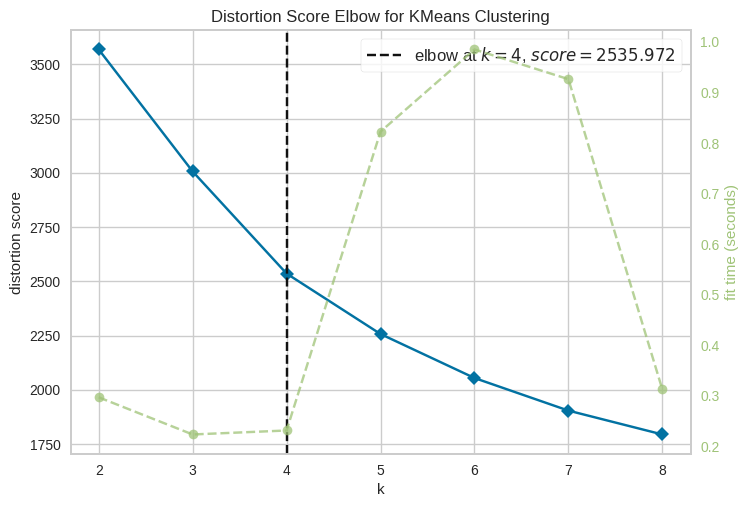

In [ ]:
# Examen rápido del método del codo para encontrar la cantidad de grupos a hacer
model = KMeans()

Elbow_M = KElbowVisualizer(model, k=8, timings= True, locate_elbow=True)
Elbow_M.fit(df_cluster)
Elbow_M.poof();

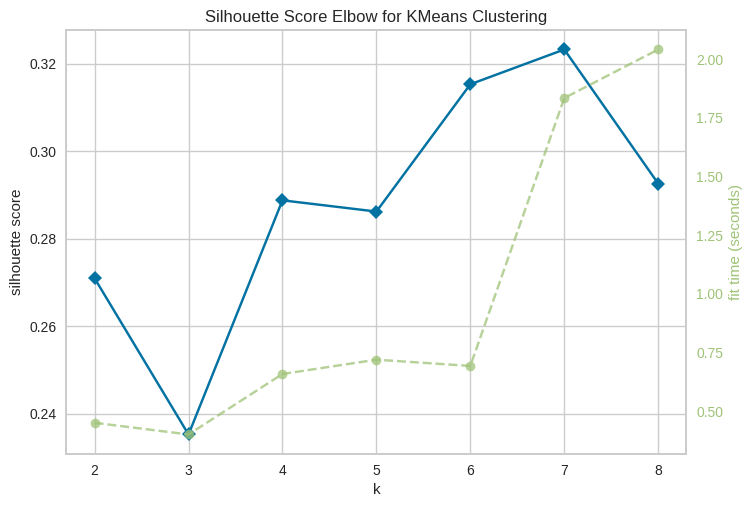

In [ ]:
Elbow_M = KElbowVisualizer(model, k=8, timings= True, metric='silhouette', locate_elbow=False)
Elbow_M.fit(df_cluster)
Elbow_M.poof();

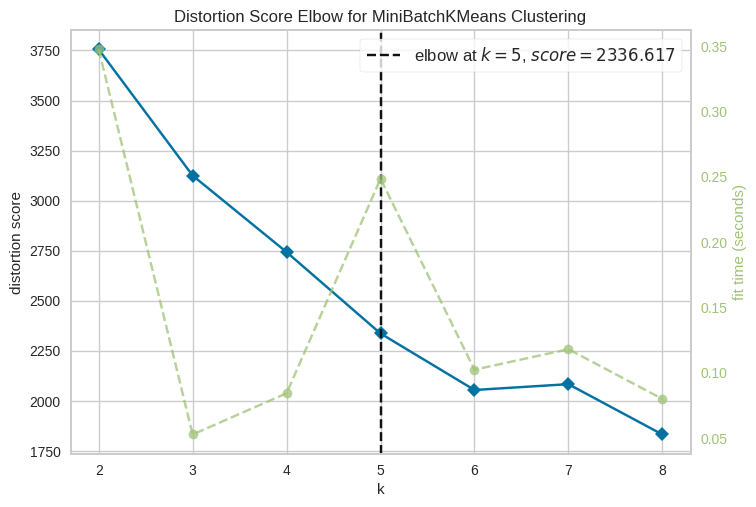

In [ ]:
model = MiniBatchKMeans()

Elbow_M = KElbowVisualizer(model, k=8, timings= True, locate_elbow=True)
Elbow_M.fit(df_cluster)
Elbow_M.poof();

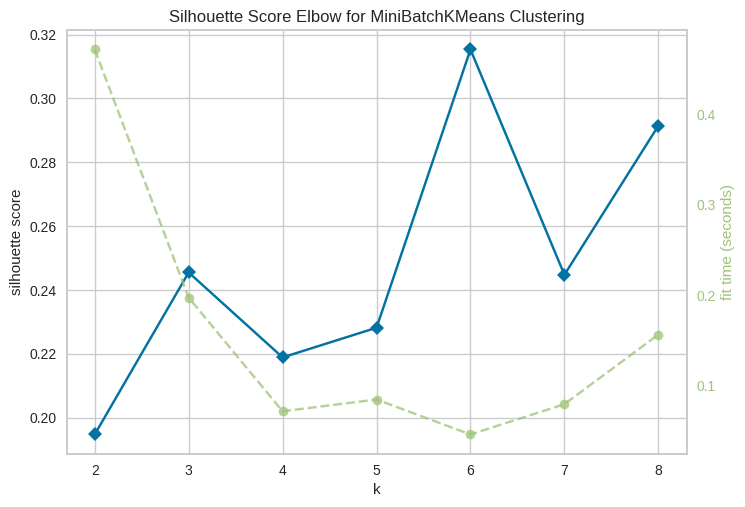

In [ ]:
Elbow_M = KElbowVisualizer(model, k=8, timings= True, metric='silhouette', locate_elbow=False)
Elbow_M.fit(df_cluster)
Elbow_M.poof();

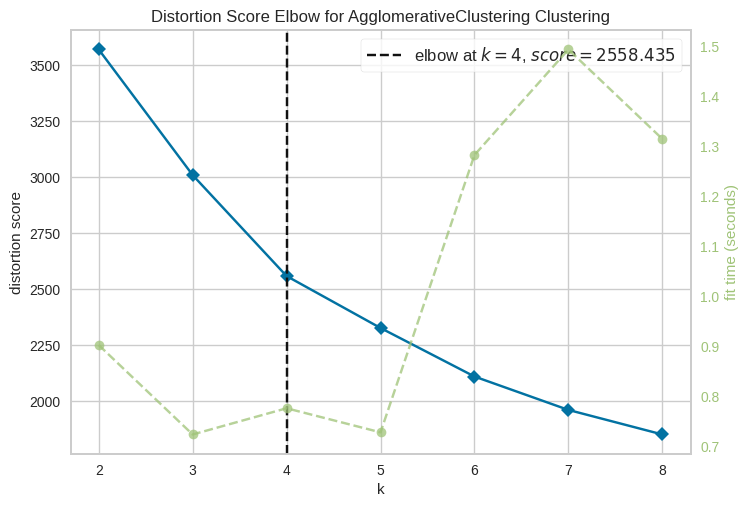

In [ ]:
model = AgglomerativeClustering()

Elbow_M = KElbowVisualizer(model, k=8, timings= True, locate_elbow=True)
Elbow_M.fit(df_cluster)
Elbow_M.poof();

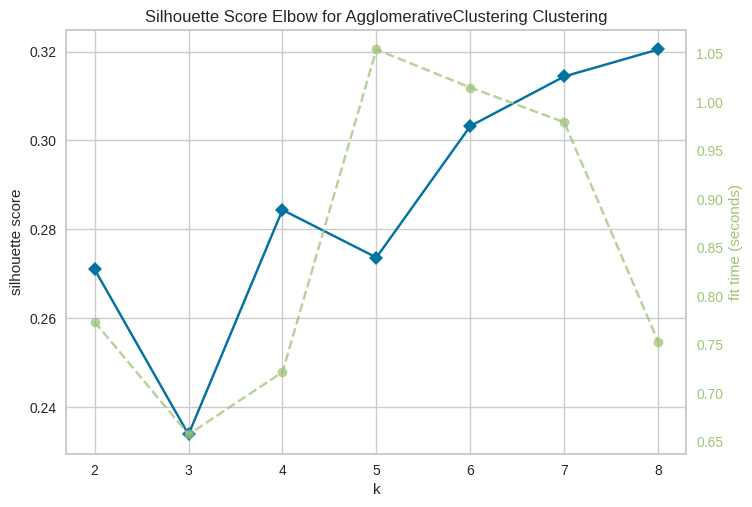

In [ ]:
Elbow_M = KElbowVisualizer(model, k=8, timings= True, metric='silhouette', locate_elbow=False)
Elbow_M.fit(df_cluster)
Elbow_M.poof();

In [ ]:
km3 = KMeans(n_clusters=4).fit(df_cluster)

In [ ]:
# Obtener las etiquetas de clúster asignadas
df_cluster['Labels_Kmeans'] = km3.labels_

In [ ]:
df_cluster

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Labels_Kmeans
0,-0.540911,-0.350949,0.074318,-0.060599,-0.070559,-0.380636,0.238780,0.055974,0
1,1.003496,-0.577169,0.205593,-0.035895,0.340446,-0.312102,0.075347,-0.029255,1
2,0.169404,0.986208,-0.862286,0.535702,0.274353,0.634601,0.201765,-0.022266,2
3,0.798489,-0.523492,-0.016899,-0.077170,0.004095,0.195877,-0.447976,0.282094,1
4,0.254601,0.650970,-0.023426,0.709921,-0.844018,-0.307330,-0.142645,0.021260,3
...,...,...,...,...,...,...,...,...,...
3097,1.268259,0.457872,0.983221,0.449955,-0.287797,0.185977,-0.405777,-0.323763,3
3098,0.126509,0.695501,-0.084077,0.754289,-0.871341,0.054354,-0.494081,-0.020345,3
3099,0.451895,0.895759,-0.213647,0.788961,0.796862,0.753449,0.223855,0.090046,2
3100,0.334219,-0.499761,0.938532,-0.325555,0.461563,0.366874,-0.257708,-0.440195,0


In [ ]:
# Calcular el porcentaje de individuos en cada clúster
cluster_percentages = df_cluster['Labels_Kmeans'].value_counts(normalize=True) * 100

# Crear una tabla con los porcentajes
percentage_table = pd.DataFrame({'obs por cluster': cluster_percentages.values})

# Mostrar la tabla
print(percentage_table)


   obs por cluster
0        41.650548
1        27.240490
2        18.214055
3        12.894907


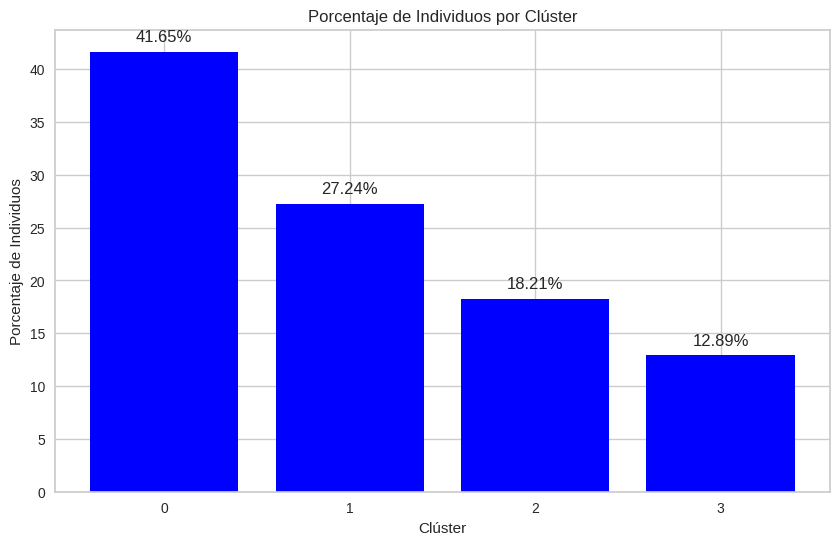

In [ ]:
import matplotlib.pyplot as plt

# Crear una figura y ejes
plt.figure(figsize=(10, 6))

# Graficar los porcentajes por clúster con etiquetas
plt.bar(cluster_percentages.index, cluster_percentages.values, color='blue')

# Agregar etiquetas de ejes y título
plt.xlabel('Clúster')
plt.ylabel('Porcentaje de Individuos')
plt.title('Porcentaje de Individuos por Clúster')

# Agregar etiquetas de porcentaje en las barras
for index, value in enumerate(cluster_percentages.values):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center')

plt.xticks(cluster_percentages.index)
plt.show()


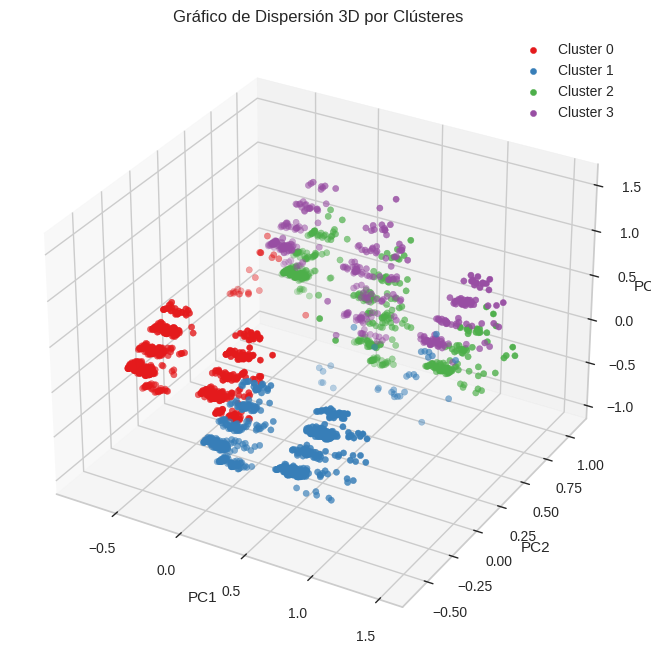

In [ ]:
# Crear una figura y ejes 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Definir colores para los clústeres
cluster_colors = sns.color_palette('Set1', df_cluster['Labels_Kmeans'].nunique())

# Iterar a través de los clústeres y graficarlos en 3D
for label, color in zip(df_cluster['Labels_Kmeans'].unique(), cluster_colors):
    cluster_data = df_cluster[df_cluster['Labels_Kmeans'] == label]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'], c=color, label=f'Cluster {label}')

# Agregar etiquetas de ejes y título
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Gráfico de Dispersión 3D por Clústeres')
ax.legend()

plt.show()

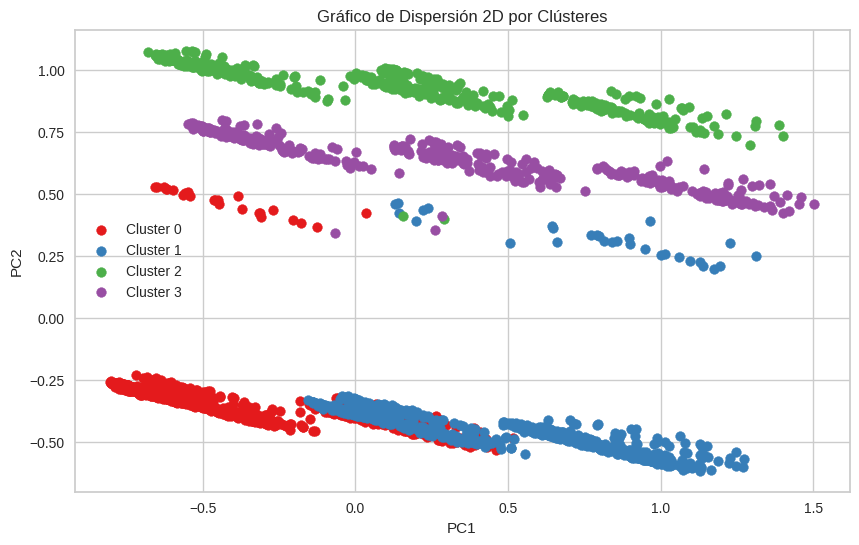

In [ ]:
# Definir colores para los clústeres
cluster_colors = sns.color_palette('Set1', df_cluster['Labels_Kmeans'].nunique())

# Crear una figura y ejes
plt.figure(figsize=(10, 6))

# Iterar a través de los clústeres y graficarlos en 2D
for label, color in zip(df_cluster['Labels_Kmeans'].unique(), cluster_colors):
    cluster_data = df_cluster[df_cluster['Labels_Kmeans'] == label]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], color=color, label=f'Cluster {label}')

# Agregar leyendas y etiquetas de ejes
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Gráfico de Dispersión 2D por Clústeres')
plt.legend()
plt.show()

In [ ]:
file_path = '/content/gdrive/MyDrive/UCM/Mario/Data/el-futuro-es-clima-anonimizado_analisis.csv'
df_clustered = pd.read_csv(file_path)

In [ ]:
df_clustered['Labels_Kmeans'] = km3.labels_

In [ ]:
df_clustered

,crisis_climatica_es_un_tema_que_me_cansa_ya,crisis_climatica_me_agobia,crisis_climatica_me_da_igual,crisis_climatica_me_preocupa,crisis_climatica_se_le_esta_dando_demasiada_importancia,crisis_climatica_siento_esperanza,crisis_climatica_tengo_miedo,vivir_padres_1_10,cambio_climatico_medios_de_comunicacion_niveles,crisis-climatica-vida-personal_niveles,...,ecoansiedad_niveles,transicion_ecologica_sin_stopwords_lemma_salida_neu,transicion_ecologica_sin_stopwords_lemma_salida_pos,haria_falta_futuro_sin_stopwords_lemma_salida_neu,haria_falta_futuro_sin_stopwords_lemma_salida_pos,haria_falta_futuro_sin_stopwords_lemma_salida_neg,precios_energia_bien_no_me_afecta_mucho,precios_energia_mal_no_voy_a_poder_pagar_las_facturas,precios_energia_por_ahora_bien_pero_si_sigue_asi_no_se_que_voy_a_hacer,Labels_Kmeans
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.000000,0.333333,1.000000,...,0.333333,0.274049,0.017084,0.525330,0.162664,0.357290,0,0,1,0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.222222,0.333333,0.666667,...,0.000000,0.940716,0.083144,0.863436,0.152838,0.051335,0,0,1,1
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.270168,0.333333,0.666667,...,1.000000,0.523490,0.251708,0.658590,0.209607,0.188912,0,1,0,2
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.777778,1.000000,1.000000,...,1.000000,0.531320,0.135535,0.553965,0.176856,0.317248,0,0,1,1
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.333333,0.333333,1.000000,...,0.524021,0.968680,0.101367,0.762115,0.102620,0.194045,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.666667,0.333333,1.000000,...,0.666667,0.710291,0.087699,0.871145,0.123362,0.071869,1,0,0,3
3098,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.666667,...,1.000000,0.029083,0.003417,0.668502,0.376638,0.022587,1,0,0,3
3099,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.222222,0.333333,0.666667,...,1.000000,0.759508,0.253986,0.687225,0.330786,0.048255,0,1,0,2
3100,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.333333,0.333333,1.000000,...,0.666667,0.222595,0.014806,0.810573,0.232533,0.026694,0,0,1,0


In [ ]:
df_clustered.groupby('Labels_Kmeans').count()

,crisis_climatica_es_un_tema_que_me_cansa_ya,crisis_climatica_me_agobia,crisis_climatica_me_da_igual,crisis_climatica_me_preocupa,crisis_climatica_se_le_esta_dando_demasiada_importancia,crisis_climatica_siento_esperanza,crisis_climatica_tengo_miedo,vivir_padres_1_10,cambio_climatico_medios_de_comunicacion_niveles,crisis-climatica-vida-personal_niveles,...,futuro_niveles,ecoansiedad_niveles,transicion_ecologica_sin_stopwords_lemma_salida_neu,transicion_ecologica_sin_stopwords_lemma_salida_pos,haria_falta_futuro_sin_stopwords_lemma_salida_neu,haria_falta_futuro_sin_stopwords_lemma_salida_pos,haria_falta_futuro_sin_stopwords_lemma_salida_neg,precios_energia_bien_no_me_afecta_mucho,precios_energia_mal_no_voy_a_poder_pagar_las_facturas,precios_energia_por_ahora_bien_pero_si_sigue_asi_no_se_que_voy_a_hacer
Labels_Kmeans,,,,,,,,,,,,,,,,,,,,,
0,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,...,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292
1,845,845,845,845,845,845,845,845,845,845,...,845,845,845,845,845,845,845,845,845,845
2,565,565,565,565,565,565,565,565,565,565,...,565,565,565,565,565,565,565,565,565,565
3,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400


In [ ]:
df_clustered.groupby('Labels_Kmeans').sum()

,crisis_climatica_es_un_tema_que_me_cansa_ya,crisis_climatica_me_agobia,crisis_climatica_me_da_igual,crisis_climatica_me_preocupa,crisis_climatica_se_le_esta_dando_demasiada_importancia,crisis_climatica_siento_esperanza,crisis_climatica_tengo_miedo,vivir_padres_1_10,cambio_climatico_medios_de_comunicacion_niveles,crisis-climatica-vida-personal_niveles,...,futuro_niveles,ecoansiedad_niveles,transicion_ecologica_sin_stopwords_lemma_salida_neu,transicion_ecologica_sin_stopwords_lemma_salida_pos,haria_falta_futuro_sin_stopwords_lemma_salida_neu,haria_falta_futuro_sin_stopwords_lemma_salida_pos,haria_falta_futuro_sin_stopwords_lemma_salida_neg,precios_energia_bien_no_me_afecta_mucho,precios_energia_mal_no_voy_a_poder_pagar_las_facturas,precios_energia_por_ahora_bien_pero_si_sigue_asi_no_se_que_voy_a_hacer
Labels_Kmeans,,,,,,,,,,,,,,,,,,,,,
0,26.0,1292.0,3.0,1157.0,3.0,110.0,972.0,329.283302,314.333683,1026.164075,...,282.5,760.517988,717.551454,164.830296,823.472467,240.207424,298.441478,0,0,1268
1,33.0,0.0,9.0,690.0,15.0,115.0,377.0,260.722179,235.247657,672.719823,...,291.5,398.298922,470.397092,122.387244,547.951542,166.968341,177.144764,0,0,815
2,24.0,355.0,3.0,471.0,6.0,43.0,368.0,130.429773,127.224580,422.333333,...,101.5,320.203404,313.327740,84.035308,355.550661,108.460699,131.522587,0,563,0
3,16.0,217.0,4.0,340.0,3.0,71.0,224.0,123.723457,124.122913,318.560314,...,136.5,214.638718,221.525727,56.167426,259.168502,77.467249,85.532854,397,0,0


In [ ]:
df_clustered.to_csv('/content/gdrive/MyDrive/UCM/Mario/Data/el-futuro-es-clima-anonimizado_resultados.csv', index=False)